In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgl
from xcorr import xcorr
from ipywidgets import widgets
from IPython.display import Audio
from scipy.io.wavfile import read
from ipywidgets import interact

In [2]:
def get_sinusoid(amp, freq, sample_freq, n_sample):
    n = np.arange(0, n_sample)
    return n/sample_freq, amp * np.sin(freq/sample_freq*2*np.pi*n)

In [2]:
def get_timeAxis(fs, sin):
    n = np.arange(len(sin))
    return n/fs

In [3]:
def niceplot():
    plt.margins(x=0)
    plt.grid()

In [5]:
def autocorrelation(sig, width, step, fs):
    step_len = int(fs*step/1000)
    sig = utils.normalize(sig)
    frames = utils.split(sig, width, step, fs)
    pitch = []
    energy = []

    for f in frames:
        lags, corr = xcorr(f, maxlag=fs//50)
        distance = utils.get_distance(lags, corr)
        pitch += [fs/distance if distance != -1 else -1]*step_len
        energy += [utils.energy(f)]*step_len

    return np.array(pitch), np.array(energy)

In [4]:
fs, sentence = read('cmu_us_bdl_arctic/wav/arctic_a0001.wav')
t = utils.get_timeAxis(fs, sentence)

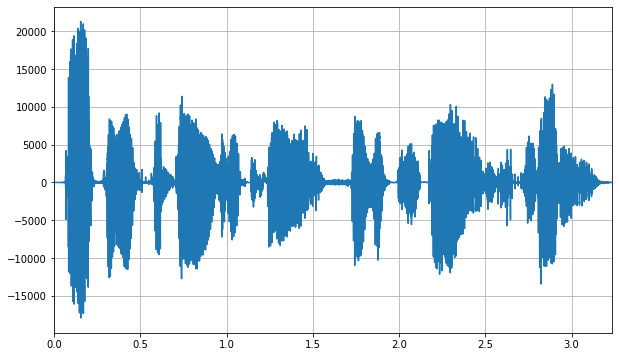

In [5]:
plt.figure(figsize=(10,6))
plt.plot(t, sentence)
niceplot()

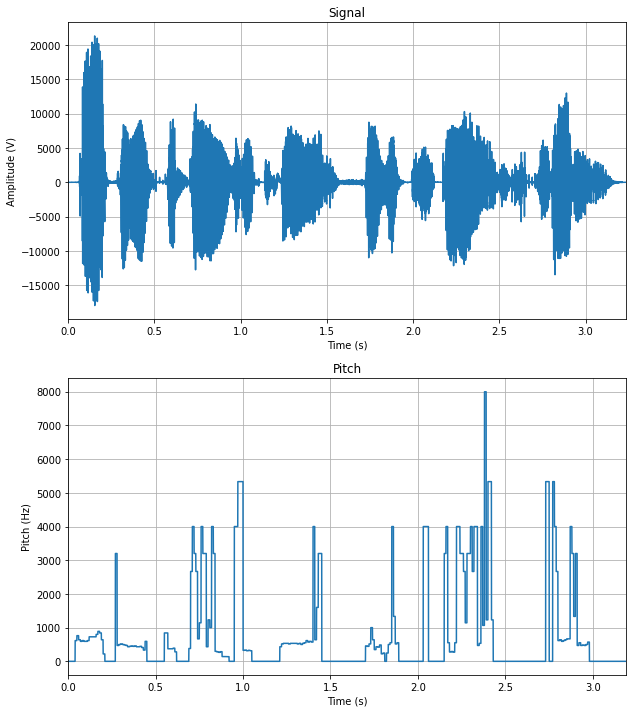

In [14]:
utils.plot_pitch(sentence, 50, 10, fs, 5)

In [9]:
# def cepstrum(frame, fs, threshold):
#     start = 32
#     logSpectrum = np.log(abs(sgl.freqz(frame)[1]))
#     ceps = abs(sgl.freqz(logSpectrum)[1])
#     return fs/np.arange(len(ceps))[ceps==ceps[start:].max()][0]

In [10]:
# a = 9
# f = 440

# armo = np.arange(1, a)
# sinla = np.zeros(fs*2)

# for k in armo:
#     sinla += get_sinusoid(6000, k*f, fs, fs*2)[1]
#     print(k*f)

# sinla = utils.normalize(sinla)
# framela = utils.split(sinla, 21, 10, fs)[12]

In [11]:
# res =utils.formants(sinla, 21, 2000, fs)
# res

In [12]:
# start = (500/(fs)*5000)

# plt.figure(figsize=(10,6))
# plt.plot(cepstrum(framela, fs, 5)[:40])
# plt.axvline(32)
# niceplot()

# fs/500
# cepstrum(framela, fs, 5)

In [13]:
# fs/36

In [14]:
# utils.plot_energy(sentence, 21, 10, fs, 5)

In [15]:
# utils.plot_pitch(sentence, 21, 15, fs, 5)

In [16]:
# utils.plot_pitch(sentence, 21, 15, fs, 5, utils.cepstrum)

In [17]:
# def get_pitch(frame, fs, threshold=5):
#     lags, corr = xcorr(frame, maxlag=fs//50)
#     distance = utils.get_distance(lags, corr)
#     energy = utils.energy(frame)
#     return fs/distance if energy >= threshold else 0

In [18]:
# width = 21
# step = 5
# fs = fs
# signal = sentence
# threshold = 5

# step_len = int(fs*step/1000)
# t = get_timeAxis(fs, signal)
# frames = utils.split(utils.normalize(signal), width, step, fs)
# pitch = []

# for f in frames:
#     pitch += [get_pitch(f, fs)]*step_len

# fig, ax = plt.subplots(2, 1, figsize=(10,12))

# ax[0].plot(t, signal)
# ax[0].set_title('Signal')
# ax[0].set_ylabel('Amplitude (V)')
# ax[0].set_xlabel('Time (s)')
# ax[0].grid()
# ax[0].margins(x=0)

# ax[1].plot(t[:len(pitch)], pitch)
# # ax[1].axhline(threshold, c='r', label='threshold')
# ax[1].set_title('Pitch')
# ax[1].set_ylabel('Pitch (Hz)')
# ax[1].set_xlabel('Time (s)')
# ax[1].grid()
# ax[1].margins(x=0)

In [19]:
# width = 21
# step = 5
# fs = fs
# signal = sentence
# threshold = 5

# step_len = int(fs*step/1000)
# t = get_timeAxis(fs, signal)
# frames = utils.split(utils.normalize(signal), width, step, fs)
# energy = []

# for f in frames:
#     energy += [utils.energy(f)]*step_len

# fig, ax = plt.subplots(2, 1, figsize=(10,12))

# ax[0].plot(t, signal)
# ax[0].set_title('Signal')
# ax[0].set_ylabel('Amplitude (V)')
# ax[0].set_xlabel('Time (s)')
# ax[0].grid()
# ax[0].margins(x=0)

# ax[1].plot(t[:len(energy)], energy, label='energy')
# ax[1].axhline(threshold, c='r', label='threshold')
# ax[1].set_title('Energy')
# ax[1].set_ylabel('Energy')
# ax[1].set_xlabel('Time (s)')
# ax[1].legend()
# ax[1].grid()
# ax[1].margins(x=0)

In [20]:
# pitch, energy = autocorrelation(sentence, 21, 5, fs)

# # plt.figure(figsize=(10,6))
# # plt.plot(pitch)
# # niceplot()

# plt.figure(figsize=(10,6))
# plt.plot(energy)
# niceplot()

# plt.figure(figsize=(10,6))
# plt.plot(t, utils.normalize(sentence))
# niceplot()

In [21]:
# def test_threshold(t):
#     freq = [f if e >= t else 0 for f,e in zip(pitch, energy)]
    
#     plt.figure(figsize=(10,6))
#     plt.axhline(t)
#     plt.plot(energy)
#     niceplot()

#     plt.figure(figsize=(10,6))
#     plt.plot(freq)
#     niceplot()
    
    
# interact(test_threshold, t=(0, 50, 0.5), continuous_update=False)

In [22]:
utils.get_distance(range(5), [0, 1, 0, 1, 0])

2